# Ian Sleep Project : tracking deep sleep

Project outline

* Objective : for my personal understanding of deep sleep, its variance and its predictors. As a bit of a sleep nerd, I want to know what factors influence my deep sleep, so that I can best optimise my life around maximising deep sleep. 

* Rationale/ Incentive for project : have always been interested in sleep since a young age. Even in high school, where the pressures of juggling extra cirricular activities such as sports and academic workload nudged many of my peers into developing poor sleep habits or sleeping less, I have always prioritised sleep. 

I am highly sensitive to sleep, often finding myself deeply affected in terms of mood, motivation and focus whenever I fail to get enough hours. Although I have been able to mitigate that in recent times by simply not thinking too much about the amount of sleep I have gotten if I failed to sleep enough the night before (psychological/placebo effect), this is still an area I would want to optimise in order to not lose out on too many happier and productive days. 

* Data: 

    * Outcome variable : Deep sleep (minutes)

    * Factors considered 
        1. Exercise and calories burnt 
        2. Alcohol
        3. Gaming 
        4. Caffeine
        5. Eating before sleeping (personal addiction)

* Data collection methods 
    * Deep sleep amount: AutoSleep app on Apple Watch SE (occasionally cross checked against Health app)
    * Exercise and calories burnt: Activity/Fitness/Health app on Apple Watch SE and iPhone 
    * Coffee: conversion to caffeine in mg is tricky due to extraction/brewing method. Currently mainly using pourover with V60, and due to variations in pour methods it is hard to pinpoint a value for the amount of caffeine. 
    * Gaming and alcohol: currently for simplicity, capturing the rough amount of alcohol for my personal taste/tolerance. Unlikely to be generalised to the general alcohol consumer since I drink quite little. Also captured hours to sleep to factor in the amount of time for alcohol to be broken down and removed from the system. For gaming, only capturing an indication variable of whether I gamed or not, and the time I stopped.

Data was collected into a google sheet via the use of a google form. 

## Step 1: download required libraries (and steps to create an API for google account) to read over the tracked data 

In [1]:
# !pip install gspread oauth2client df2gspread

Code to read in data

Code taken from https://medium.com/@techno021/integrate-google-sheets-with-jupyter-notebook-e25a4c349828

In [9]:
import gspread
import pandas as pd
import matplotlib.pyplot as plt
from oauth2client.service_account import ServiceAccountCredentials
import seaborn as sns

/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [55]:
spreadsheet_key = "1P8QXlvv3gB0A4ZSXc9h6yAs-O0Q-c67T4s7TCnvmCHM"
scope = "https://spreadsheets.google.com/feeds"
credentials = ServiceAccountCredentials.from_json_keyfile_name("./ian-sleep-tracker-a0427f1cbee8.json", scope)
worksheet = gspread.authorize(credentials).open_by_key(spreadsheet_key).worksheet("Form responses 1")
data = worksheet.get_all_values()
headers = data.pop(0)
df = pd.DataFrame(data, columns=headers)

### Check data

In [19]:
df.head()

,Timestamp,Sleep quality,Deep Sleep duration,Alcohol,Alcohol hours before bed,Full before bed?,Music while sleeping?,Type of music,Caffiene,Exercise,Calories count,Game,Date of the night,chamomile,Coffee Type,Other,Amount of sleep,REM sleep,Other
0,27/02/2024 20:04:17,Bad,19,None,NA,Yes,Yes,Sleep classical,Morning,Gym,,None,,,,,07:17:00,,
1,26/02/2024 20:08:45,Good,59,Yes,7,No,Yes,,Morning,Football,1000+,None,25/02/2024,,,,07:46:00,,
2,28/02/2024 08:20:33,Good,54,None,,No,Yes,Binaural beats,Morning,,300,None,,,,,08:14:30,,
3,29/02/2024 08:13:59,Good,58,Yes,2,No,Yes,Sleeping jazz,Morning,Football + Gym,877,None,,Chamomile after 10,Half flat white,,09:30:00,,
4,01/03/2024 09:07:22,Good,69,None,,No,Yes,Binaural,Morning,,500,None,,Chamomile at 8 pm,Half flat white,,07:40:30,,


In [5]:
df.tail()

,Timestamp,Sleep quality,Deep Sleep duration,Alcohol,Alcohol hours before bed,Full before bed?,Music while sleeping?,Type of music,Caffiene,Exercise,Calories count,Game,Date of the night,chamomile,Coffee Type,Other,Amount of sleep,REM sleep,Other
22,22/03/2024 01:38:08,OK,57,None,,No,No,,Morning,,470,None,,None,Kopi,,07:20:00,,
23,23/03/2024 03:34:02,OK,47,None,,No,No,,Morning,Gym,700,None,,None,Kopi,Argument with dad late at night,09:42:30,,
24,26/03/2024 01:42:16,Bad,35,None,,No,No,,Morning,None,380,None,,None,Kopi,Sleep cycle messed up in sg,6:00,,
25,27/03/2024 02:05:46,Bad,33,None,,No,No,,None,Football + Gym,1073,None,,None,Kopi,Might be sick,7:15,,
26,30/03/2024 01:15:11,Good,44,None,,No,No,,Morning,Swim,485,Past 10pm,,None,Kopi,Still sick,8:00,,


### Basic data wrangling: Creating a more readable date column and a day column

In [58]:
import datetime 

df['Timestamp'].apply(lambda x:type(x)).value_counts() ## type is read by python as string

## Create 'Date of night' column 
df['Date of night'] = df['Timestamp'].str[0:10]
## Check
df['Date of night'].head()

## Create a day column
df['Date of night'] = pd.to_datetime(df['Date of night'], format='%d/%m/%Y')
df['day_of_week'] = df['Date of night'].dt.strftime('%a')

In [59]:
print(f'How many nights worth of data so far? : \n {df.shape[0]}')
print(f"From when to when? : \n {min(df['Date of night']).strftime('%d %b %y')} to {max(df['Date of night']).strftime('%d %b %y')}" )

How many nights worth of data so far? : 
 27
From when to when? : 
 26 Feb 24 to 30 Mar 24


## Missing days analysis 

In [75]:
## Generate a full date range (all dates from start to end of sleep tracker)
full_date_range = pd.date_range(df['Date of night'].min(), df['Date of night'].max())
full_date_range_set = set(full_date_range)

## Compare to existing data for dates
my_date_range_set = set(df['Date of night'])

## Missing dates 
missing_dates = full_date_range_set - my_date_range_set
print(f'Missing dates: {sorted([missing_date.strftime("%d %b") for missing_date in missing_dates])}')
## Missing proportion 
print(f"Prop of dates missed: {len(missing_dates)/df.shape[0]:.2%}")

Missing dates: ['17 Mar', '18 Mar', '19 Mar', '24 Mar', '25 Mar', '28 Mar', '29 Mar']
Prop of dates missed: 25.93%


Missing dates details
* Didn't record for 17-19 Mar due to jet lag, would have been anomalies.
* Fell sick around 27 Mar for a few days

### Cleaning : converting data types 

In [53]:
## Clean col names -- remove trailing white spaces 
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['Timestamp', 'Sleep quality', 'Deep Sleep duration', 'Alcohol',
       'Alcohol hours before bed', 'Full before bed?', 'Music while sleeping?',
       'Type of music', 'Caffiene', 'Exercise', 'Calories count', 'Game',
       'Date of the night', 'chamomile', 'Coffee Type', 'Other',
       'Amount of sleep', 'REM sleep', 'Other', 'Date of night',
       'day_of_week'],
      dtype='object')

In [77]:
## Numeric col types 
numeric_cols_indices = [2, 4, 10]
print(df.columns[numeric_cols_indices])
for num_col in df.columns[numeric_cols_indices]:
    df[num_col] = pd.to_numeric(df[num_col], errors='coerce')

Index(['Deep Sleep duration', 'Alcohol hours before bed ', 'Calories count'], dtype='object')


In [84]:
## Handling amount of sleep
## format of AoS: hh:mm:ss
df['Amount of sleep hours'] = [pd.to_numeric(amt.split(":")[0]) +  pd.to_numeric(amt.split(":")[1])/60 for amt in df['Amount of sleep']]

# Time series visualisations

In [102]:
## To allow smoother curves, we will impute for the missing dates
df_full_dates = df.set_index('Date of night').reindex(full_date_range).fillna(0)
df_full_dates.head()

,Timestamp,Sleep quality,Deep Sleep duration,Alcohol,Alcohol hours before bed,Full before bed?,Music while sleeping?,Type of music,Caffiene,Exercise,...,Game,Date of the night,chamomile,Coffee Type,Other,Amount of sleep,REM sleep,Other,day_of_week,Amount of sleep hours
2024-02-26,26/02/2024 20:08:45,Good,59.0,Yes,7.0,No,Yes,,Morning,Football,...,None,25/02/2024,,,,07:46:00,,,Mon,7.766667
2024-02-27,27/02/2024 20:04:17,Bad,19.0,None,0.0,Yes,Yes,Sleep classical,Morning,Gym,...,None,,,,,07:17:00,,,Tue,7.283333
2024-02-28,28/02/2024 08:20:33,Good,54.0,None,0.0,No,Yes,Binaural beats,Morning,,...,None,,,,,08:14:30,,,Wed,8.233333
2024-02-29,29/02/2024 08:13:59,Good,58.0,Yes,2.0,No,Yes,Sleeping jazz,Morning,Football + Gym,...,None,,Chamomile after 10,Half flat white,,09:30:00,,,Thu,9.500000
2024-03-01,01/03/2024 09:07:22,Good,69.0,None,0.0,No,Yes,Binaural,Morning,,...,None,,Chamomile at 8 pm,Half flat white,,07:40:30,,,Fri,7.666667


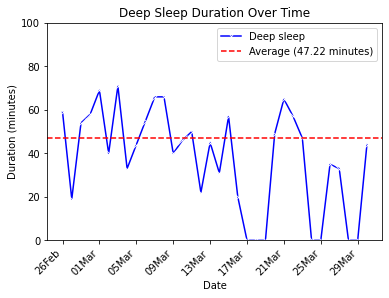

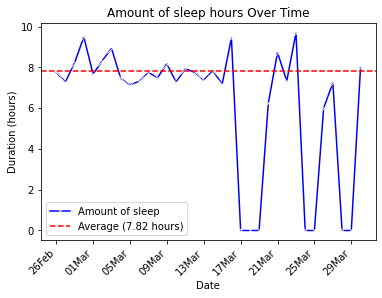

In [137]:
## Plot time series for deep sleep
sns.lineplot(x = df_full_dates.index, y = df_full_dates['Deep Sleep duration'], 
             marker='x', markersize = 10, color = 'b', label = 'Deep sleep')
plt.ylim(0, 100)
plt.title("Deep Sleep Duration Over Time")
plt.xlabel("Date")
plt.ylabel("Duration (minutes)")
plt.xticks(df_full_dates.index[::4], ##interval for tick markers -- only choose every 4 days 
           df_full_dates.index[::4].strftime('%d%b'), ##label for tick markers 
           rotation=45, ha='right')

## Plot horizontal line for average deep sleep
average_deep_sleep = df_full_dates['Deep Sleep duration'].replace(0, float('nan')).mean()
plt.axhline(y = average_deep_sleep, color = 'r', linestyle = '--', label = f'Average ({average_deep_sleep:.2f} minutes)')

plt.legend()
plt.show()

##########
##########
##########
## Plot time series for total sleep
sns.lineplot(x = df_full_dates.index, y = df_full_dates['Amount of sleep hours'], 
             marker='x', markersize = 10, color = 'b', label = 'Amount of sleep')
plt.title("Amount of sleep hours Over Time")
plt.xlabel("Date")
plt.ylabel("Duration (hours)")
plt.xticks(df_full_dates.index[::4], ##interval for tick markers -- only choose every 4 days 
           df_full_dates.index[::4].strftime('%d%b'), ##label for tick markers 
           rotation=45, ha='right')

## Plot horizontal line for average deep sleep
average_sleep = df_full_dates['Amount of sleep hours'].replace(0, float('nan')).mean()
plt.axhline(y = average_sleep, color = 'r', linestyle = '--', label = f'Average ({average_sleep:.2f} hours)')

plt.legend()
plt.show()



## Weekly seasonality 

<Figure size 720x432 with 0 Axes>

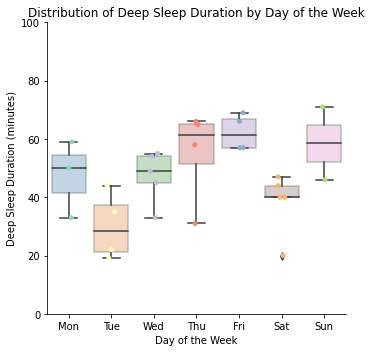

In [154]:
# Extract the day of the week (0 = Monday, 6 = Sunday)
df_full_dates['Day of Week'] = df_full_dates.index.dayofweek

# Drop the 0 values
df_full_dates_no_0s = df_full_dates[df_full_dates['Deep Sleep duration']!= 0]

# Create a boxplot to show the distribution of deep sleep duration for each day
plt.figure(figsize=(10, 6))
sns.catplot(x='Day of Week', y='Deep Sleep duration', data=df_full_dates_no_0s, palette='Set3')
sns.boxplot(x='Day of Week', y='Deep Sleep duration', data=df_full_dates_no_0s,  boxprops=dict(alpha=.3))

plt.ylim(0,100)
plt.xlabel("Day of the Week")
plt.ylabel("Deep Sleep Duration (minutes)")
plt.title("Distribution of Deep Sleep Duration by Day of the Week")
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Show the plot
plt.tight_layout()
plt.show()

At the current sample size, it looks like there is some change or pattern over deep sleep across days, with Fri and Sun having relatively high levels of deep sleep. 

From Tues to Fri, it looks like there is some linear increase in deep sleep levels.

But more data is required